In [116]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data (3).csv


In [117]:
import pandas as pd

In [120]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data (3).csv']))



In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

In [122]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,...,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.152945,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,...,0.946011,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615
std,0.359936,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,...,0.225996,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


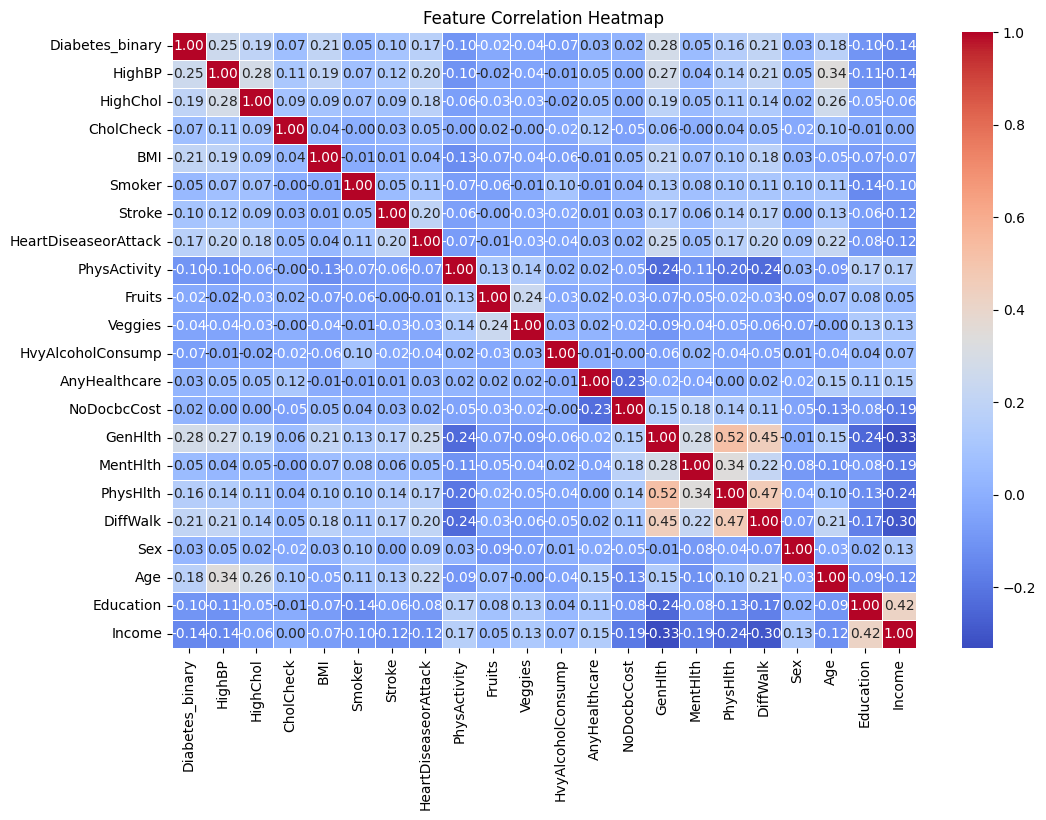

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# High Correlated with heart disease or attack:
*   highbp(0.20)
*   Diabetes(0.17)
*   highcol (0.18)
*   smoker (0.11) **only**
*   stroke (.20)
*   **highest**:gen health  (0.25)
*   age (0.22)
*  diffwalk (0.20)
*   phyhealth (0. 17 )
*   income (-0.12) **only negative corr **


In [213]:
selected_features = ["HighBP", "Diabetes_binary", "HighChol", "Stroke",
                     "GenHlth", "Age", "DiffWalk", "PhysHlth", "HeartDiseaseorAttack","Smoker","Income"]
df_selected = df[selected_features]
data=df_selected
data.head()


,HighBP,Diabetes_binary,HighChol,Stroke,GenHlth,Age,DiffWalk,PhysHlth,HeartDiseaseorAttack,Smoker,Income
0,1.0,0.0,1.0,0.0,5.0,9.0,1.0,15.0,0.0,1.0,3.0
1,0.0,0.0,0.0,0.0,3.0,7.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0,5.0,9.0,1.0,30.0,0.0,0.0,8.0
3,1.0,0.0,0.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,6.0
4,1.0,0.0,1.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,4.0


Before smote


In [125]:
from sklearn.model_selection import train_test_split

X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (183579, 10)
X_test shape: (45895, 10)
y_train shape: (183579,)
y_test shape: (45895,)


After smote

In [168]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("X_train_resampled shape:", X_resampled.shape)
print("y_train_resampled shape:", y_resampled.shape)


X_train_resampled shape: (411522, 10)
y_train_resampled shape: (411522,)


In [167]:
from collections import Counter

print("Original y_train distribution:", Counter(y_train))
print("Resampled y_train distribution:", Counter(y_resampled))


Original y_train distribution: Counter({0.0: 164730, 1.0: 18849})
Resampled y_train distribution: Counter({0.0: 164730, 1.0: 164730})


In [169]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

print("X_train_resampled shape:", X_train_resampled.shape)
print("X_test_resampled shape:", X_test_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("y_test_resampled shape:", y_test_resampled.shape)


X_train_resampled shape: (329217, 10)
X_test_resampled shape: (82305, 10)
y_train_resampled shape: (329217,)
y_test_resampled shape: (82305,)


# Random Forest

Imbalanced

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [128]:
y_pred = rf_model.predict(X_test)

In [129]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8827541126484366


In [138]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     41031
         1.0       0.38      0.16      0.23      4864

    accuracy                           0.88     45895
   macro avg       0.64      0.57      0.58     45895
weighted avg       0.85      0.88      0.86     45895



In [130]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[39723  1308]
 [ 4073   791]]


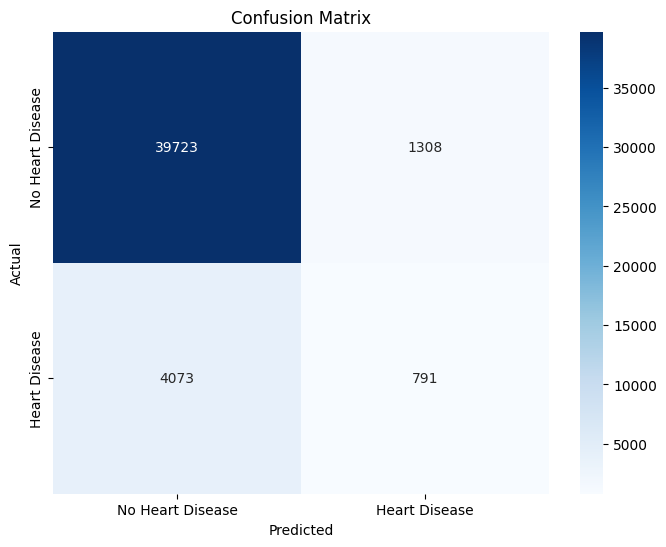

In [131]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Balanced

In [177]:
rf_model2 = RandomForestClassifier(random_state=42)

In [178]:
rf_model2b.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [179]:
y_pred2b = rf_model2b.predict(X_test_resampled)


In [180]:
accuracy2b = accuracy_score(y_test_resampled, y_pred2b)
print("Accuracy (Balanced Data):", accuracy2b)


Accuracy (Balanced Data): 0.8689994532531438


In [181]:
print("\nClassification Report (Balanced Data):\n", classification_report(y_test_resampled, y_pred2b))


Classification Report (Balanced Data):
               precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     41129
         1.0       0.87      0.87      0.87     41176

    accuracy                           0.87     82305
   macro avg       0.87      0.87      0.87     82305
weighted avg       0.87      0.87      0.87     82305



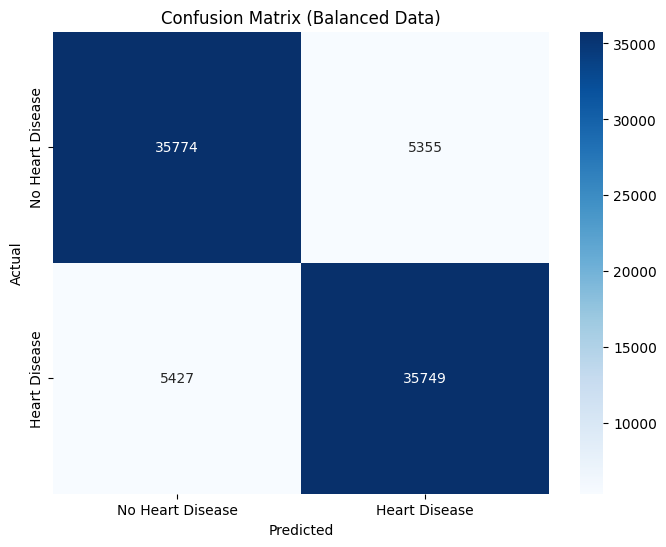

In [182]:
cm2b = confusion_matrix(y_test_resampled, y_pred2b)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2b, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Balanced Data)')
plt.show()

# Logsitic regresion

Imbalanced

In [183]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [184]:
y_pred_log_reg = log_reg_model.predict(X_test)

In [157]:
accuracy_logreg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy (Logistic Regression - Imbalanced):", accuracy_logreg)

Accuracy (Logistic Regression - Imbalanced): 0.8960671097069397


In [158]:
print("\nClassification Report (Logistic Regression - Imbalanced):\n", classification_report(y_test, y_pred_log_reg))


Classification Report (Logistic Regression - Imbalanced):
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     41031
         1.0       0.55      0.10      0.17      4864

    accuracy                           0.90     45895
   macro avg       0.73      0.55      0.56     45895
weighted avg       0.87      0.90      0.86     45895



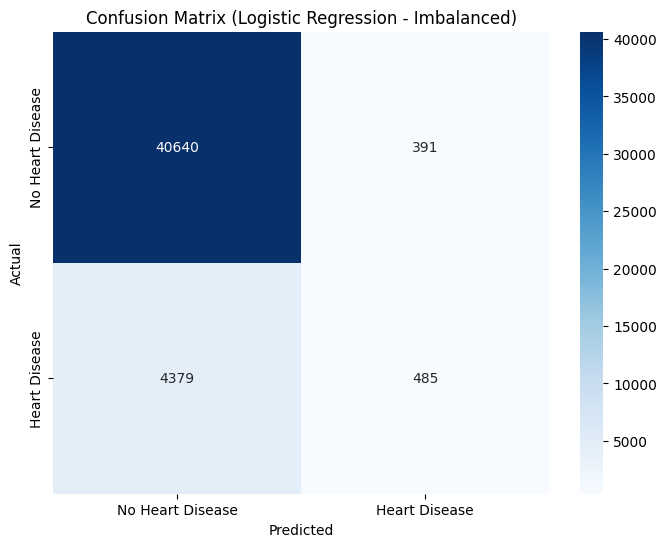

In [159]:
cm_logreg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression - Imbalanced)')
plt.show()


Balanced

In [186]:
log_reg_model2b= LogisticRegression(random_state=42)
log_reg_model2b.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

In [187]:
y_pred_log_reg2b= log_reg_model2b.predict(X_test_resampled)

In [188]:
accuracy_log_reg_balanced = accuracy_score(y_test_resampled, y_pred_log_reg2b)
print("Accuracy (Logistic Regression - Balanced):", accuracy_log_reg_balanced)

Accuracy (Logistic Regression - Balanced): 0.7500759370633618


In [190]:
print("\nClassification Report (Logistic Regression - Balanced):\n", classification_report(y_test_resampled, y_pred_log_reg2b))


Classification Report (Logistic Regression - Balanced):
               precision    recall  f1-score   support

         0.0       0.77      0.72      0.74     41129
         1.0       0.74      0.78      0.76     41176

    accuracy                           0.75     82305
   macro avg       0.75      0.75      0.75     82305
weighted avg       0.75      0.75      0.75     82305



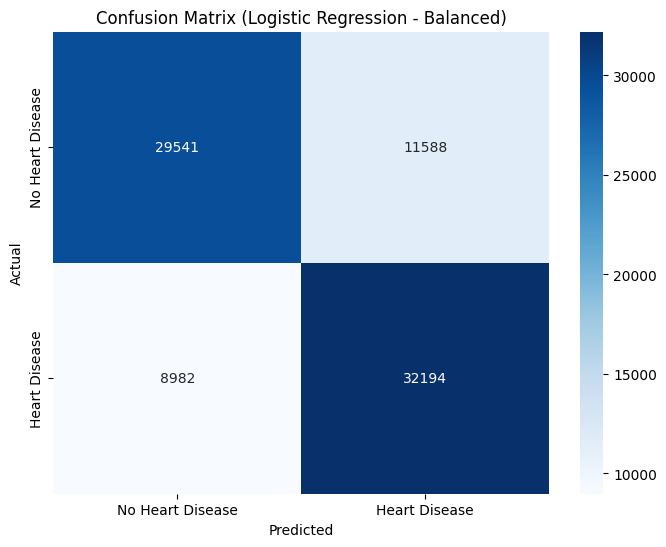

In [192]:
cm_logreg_balanced = confusion_matrix(y_test_resampled, y_pred_log_reg2b)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_balanced, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression - Balanced)')
plt.show()

# XGBoost

Imbalanced

In [193]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [194]:
y_pred_xgb = xgb_model.predict(X_test)

In [195]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy (XGBoost - Imbalanced):", accuracy_xgb)

Accuracy (XGBoost - Imbalanced): 0.8959799542433816


In [196]:
print("\nClassification Report (XGBoost - Imbalanced):\n", classification_report(y_test, y_pred_xgb))


Classification Report (XGBoost - Imbalanced):
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.94     41031
         1.0       0.56      0.09      0.16      4864

    accuracy                           0.90     45895
   macro avg       0.73      0.54      0.55     45895
weighted avg       0.87      0.90      0.86     45895



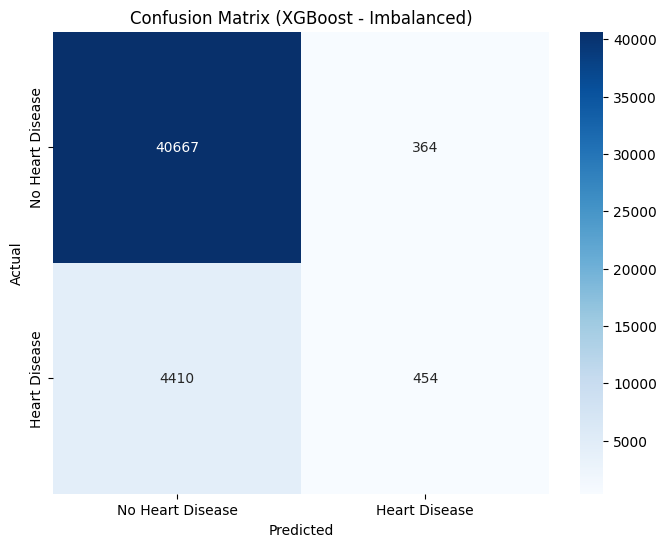

In [197]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost - Imbalanced)')
plt.show()

Balanced

In [198]:
xgb_model2b = xgb.XGBClassifier(random_state=42)
xgb_model2b.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [199]:
y_pred_xgb2b = xgb_model2b.predict(X_test_resampled)

In [200]:
accuracy_xgb_balanced = accuracy_score(y_test_resampled, y_pred_xgb2b)
print("Accuracy (XGBoost - Balanced):", accuracy_xgb_balanced)

Accuracy (XGBoost - Balanced): 0.8603730028552335


In [201]:
print("\nClassification Report (XGBoost - Balanced):\n", classification_report(y_test_resampled, y_pred_xgb2b))


Classification Report (XGBoost - Balanced):
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86     41129
         1.0       0.87      0.84      0.86     41176

    accuracy                           0.86     82305
   macro avg       0.86      0.86      0.86     82305
weighted avg       0.86      0.86      0.86     82305



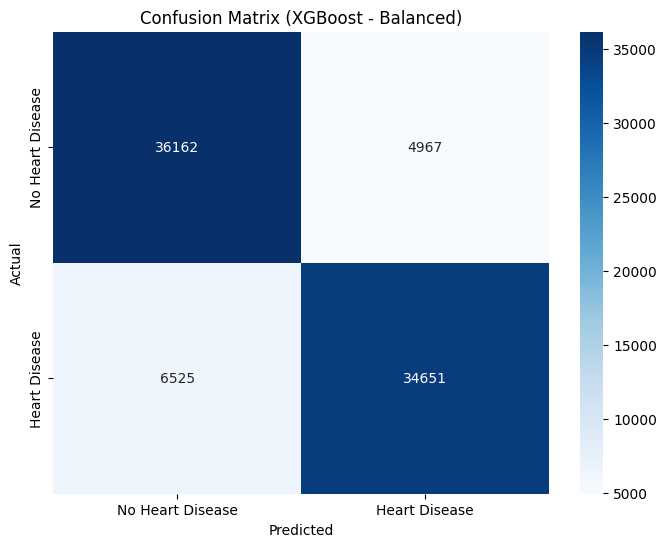

In [202]:
cm_xgb_balanced = confusion_matrix(y_test_resampled, y_pred_xgb2b)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_balanced, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost - Balanced)')
plt.show()


# Pipeline

Imbalanced

In [203]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2, interaction_only=True)),
    ("log_reg", LogisticRegression(class_weight="balanced", random_state=42))
])
pipe.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [204]:
ypredict_pipe= pipe.predict(X_test)

In [205]:
accuracy_pipe = accuracy_score(y_test, ypredict_pipe)
print("Accuracy (Pipe - Imbalanced):", accuracy_pipe)

Accuracy (Pipe - Imbalanced): 0.7311253949231943


In [206]:
print("\nClassification Report (Pipe - Imbalanced):\n", classification_report(y_test, ypredict_pipe))


Classification Report (Pipe - Imbalanced):
               precision    recall  f1-score   support

         0.0       0.96      0.73      0.83     41031
         1.0       0.25      0.76      0.38      4864

    accuracy                           0.73     45895
   macro avg       0.61      0.74      0.60     45895
weighted avg       0.89      0.73      0.78     45895



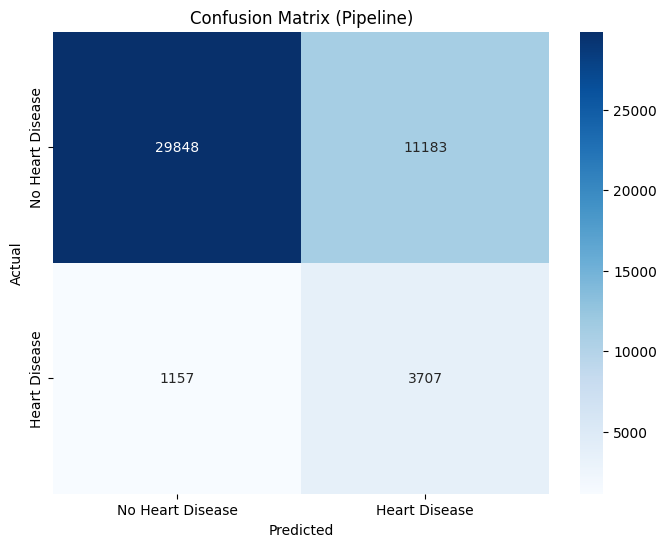

In [207]:
cm_pipe= confusion_matrix(y_test, ypredict_pipe)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pipe, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Pipeline)')
plt.show()

Balanced

In [208]:
pipe2 = Pipeline([
    ("poly", PolynomialFeatures(degree=2, interaction_only=True)),
    ("log_reg", LogisticRegression(class_weight="balanced", random_state=42))
])
pipe2.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [209]:
ypredict_pipe2= pipe2.predict(X_test_resampled)

In [210]:
accuracy_pipe2 = accuracy_score(y_test_resampled, ypredict_pipe2)
print("Accuracy (Pipe - Balanced):", accuracy_pipe2)

Accuracy (Pipe - Balanced): 0.746856205576818


In [211]:
print("\nClassification Report (Pipe - Balanced):\n", classification_report(y_test_resampled, ypredict_pipe2))


Classification Report (Pipe - Balanced):
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     41129
         1.0       0.74      0.76      0.75     41176

    accuracy                           0.75     82305
   macro avg       0.75      0.75      0.75     82305
weighted avg       0.75      0.75      0.75     82305



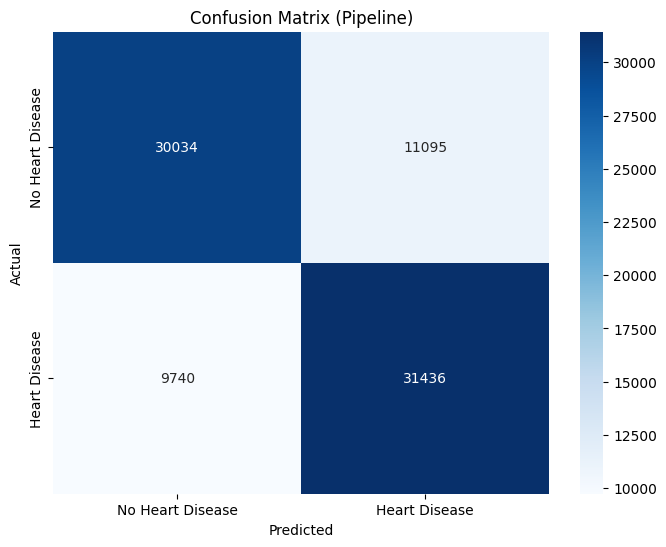

In [212]:
cm_pipe= confusion_matrix(y_test_resampled, ypredict_pipe2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pipe, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Pipeline)')
plt.show()